In [59]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv('Report25_vsPlayerFinal.csv', encoding = 'ISO-8859-1')

In [61]:
print(df.head(25))
print(df.columns)
print(len(df))

   Player Alias  Poker Site  Hands  Net Won     VP$IP       PFR      3Bet  \
0      Player 1          19    155   -51.45  0.200000  0.154839  0.021277   
1      Player 2           1    176   -23.32  0.420455  0.096591  0.015385   
2      Player 3           1   3171   108.30  0.196783  0.121728  0.034636   
3      Player 4           1     70     2.53  0.228571  0.142857  0.076923   
4      Player 5           2    241    42.23  0.232365  0.082988  0.027027   
5      Player 6           1    107   -16.04  0.289720  0.056075  0.000000   
6      Player 7          19     70    16.92  0.457143  0.057143  0.038462   
7      Player 8           2    198     5.93  0.469697  0.080808  0.012658   
8      Player 9           2    116    -4.27  0.284483  0.008621  0.024390   
9     Player 10           2     47   -41.49  0.276596  0.000000  0.000000   
10    Player 11           2     55    -6.76  0.236364  0.072727  0.000000   
11    Player 12           2    125    62.24  0.512000  0.152000  0.133333   

In [62]:
df.columns = ['Player Alias', 'Poker Site', 'Hands', 'Net Won', 'VP$IP', 'PFR',
       '3Bet', 'PostflopAggPercent', 'W$WSFPercent', 'WTSDPercent', 'Won$atSD', 'Wins',
       'Losses', 'VsPlayer']

In [63]:
df['Wins'] = df['Wins'].fillna(0)
df['Losses'] = df['Losses'].fillna(0)
df['VsPlayer'] = df['VsPlayer'].fillna(0)

In [64]:
df['HandsVsPlayer'] = df['Wins'] + df['Losses']
df['bbPer100h_VsPlayer'] = (df['VsPlayer'] / .25) / (df['HandsVsPlayer'] / 100)

In [65]:
df['bbPer100h_VsPlayer'] = df['bbPer100h_VsPlayer'].fillna(0)

In [66]:
df['bb_won'] = df['Net Won'] / 0.25
df['bb_won_per100h'] = df['bb_won'] / (df['Hands'] / 100)
df['pfr_rate'] = df['PFR'] / df['VP$IP']

In [67]:
df['pfr_rate'] = df['pfr_rate'].fillna(0)

In [68]:
df = df.drop(df.index[17219])

In [69]:
marks = df[df['bbPer100h_VsPlayer'] > 0]
total = marks['bbPer100h_VsPlayer'].sum()
pareto_marks = total * 0.8
print(pareto_marks)

219566.6249301202


In [70]:
marks = marks.sort_values('bbPer100h_VsPlayer', ascending=False)

In [71]:
marks['bbPer100h_cum'] = marks['bbPer100h_VsPlayer'].cumsum() 

In [72]:
def top20(col):
    if col <= pareto_marks:
        return "Pareto Mark"
    else:
        return "Mark"
    
    
marks['Pareto'] = marks['bbPer100h_cum'].apply(top20)

In [73]:
print(marks.head())

       Player Alias  Poker Site  Hands  Net Won     VP$IP       PFR      3Bet  \
9718    Player 9719           2    115   -71.16  0.539130  0.017391  0.000000   
27929  Player 27930          19     94   -60.23  0.563830  0.180851  0.025000   
21700  Player 21701          19    154   -84.18  0.357143  0.116883  0.043478   
23992  Player 23993          19     46   -30.00  0.478261  0.086957  0.000000   
9714    Player 9715          19    146   -51.38  0.390411  0.150685  0.000000   

       PostflopAggPercent  W$WSFPercent  WTSDPercent     ...       Wins  \
9718             0.226277      0.442623     0.327869     ...        6.0   
27929            0.597938      0.625000     0.270833     ...        3.0   
21700            0.324324      0.423077     0.326923     ...        6.0   
23992            0.676471      0.600000     0.150000     ...        6.0   
9714             0.314607      0.382979     0.234043     ...        7.0   

       Losses  VsPlayer  HandsVsPlayer  bbPer100h_VsPlayer  bb

In [126]:
sharks = df[(df['bbPer100h_VsPlayer'] <= 0) & (df['HandsVsPlayer'] >= 1)]
total = sharks['bbPer100h_VsPlayer'].sum()
pareto_sharks = total * 0.8
print(pareto_sharks)

-179281.88516627648


In [75]:
sharks = sharks.sort_values('bbPer100h_VsPlayer')

In [76]:
sharks['bbPer100h_cum'] = sharks['bbPer100h_VsPlayer'].cumsum()    

In [77]:
print(sharks.head())

       Player Alias  Poker Site  Hands  Net Won     VP$IP       PFR      3Bet  \
28737  Player 28738          19     86    55.28  0.441860  0.162791  0.034483   
23981  Player 23982          19    192    14.11  0.166667  0.088542  0.041667   
9948    Player 9949          19    118    23.10  0.161017  0.127119  0.023810   
26354  Player 26355          19     86    43.81  0.279070  0.162791  0.054054   
28344  Player 28345          19    113    31.12  0.256637  0.008850  0.025641   

       PostflopAggPercent  W$WSFPercent  WTSDPercent  Won$atSD  Wins  Losses  \
28737            0.382353      0.588235     0.294118  0.600000   2.0    11.0   
23981            0.240741      0.423077     0.346154  0.666667   3.0     8.0   
9948             0.333333      0.529412     0.411765  0.571428   4.0     7.0   
26354            0.484848      0.500000     0.312500  0.600000   2.0    10.0   
28344            0.454545      0.482759     0.241379  0.571428   5.0     6.0   

       VsPlayer  HandsVsPlayer  

In [78]:
def bottom20(col):
    if col >= pareto_sharks:
        return "Pareto Shark"
    else:
        return "Shark"
    
sharks['Pareto'] = sharks['bbPer100h_cum'].apply(bottom20)

In [79]:
zero = df[(df['bbPer100h_VsPlayer'] == 0) & (df['HandsVsPlayer'] >= 10)]
print(len(zero))

19


In [80]:
zero['Pareto'] = "None"

C:\Users\GamingFoSho\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [81]:
df_opps = marks.append(sharks)
df_opps = df_opps.append(zero)

In [82]:
print(df_opps.head())
print(len(df_opps))

           3Bet  Hands  HandsVsPlayer  Losses  Net Won       PFR       Pareto  \
9718   0.000000    115           13.0     7.0   -71.16  0.017391  Pareto Mark   
27929  0.025000     94           11.0     8.0   -60.23  0.180851  Pareto Mark   
21700  0.043478    154           12.0     6.0   -84.18  0.116883  Pareto Mark   
23992  0.000000     46           10.0     4.0   -30.00  0.086957  Pareto Mark   
9714   0.000000    146           17.0    10.0   -51.38  0.150685  Pareto Mark   

       Player Alias  Poker Site  PostflopAggPercent    ...     VsPlayer  \
9718    Player 9719           2            0.226277    ...        46.37   
27929  Player 27930          19            0.597938    ...        37.43   
21700  Player 21701          19            0.324324    ...        39.83   
23992  Player 23993          19            0.676471    ...        31.68   
9714    Player 9715          19            0.314607    ...        53.58   

       W$WSFPercent  WTSDPercent  Wins  Won$atSD  bbPer100h_Vs

In [83]:
df_opps.sort_index(inplace=True)

In [84]:
print(df_opps)

           3Bet  Hands  HandsVsPlayer  Losses  Net Won       PFR  \
16     0.094972   1057          103.0    82.0  -269.21  0.243141   
24     0.049689    390           19.0    14.0   -87.12  0.102564   
36     0.027778    716           10.0     6.0   -40.88  0.138268   
51     0.073333    427           24.0    16.0    -8.78  0.126464   
56     0.045662   1298           76.0    33.0   -18.45  0.083975   
68     0.039801    567           32.0    12.0    16.86  0.082892   
69     0.048295    984           49.0    19.0    18.35  0.071138   
73     0.065574    174           18.0     9.0   -11.13  0.178161   
88     0.036364   7074            6.0     3.0    37.43  0.116342   
97     0.000000     84           11.0     8.0    12.14  0.107143   
104    0.042373    353           20.0     7.0   -24.82  0.093484   
108    0.036712   5028           42.0    20.0    24.49  0.091687   
130    0.035714    267           21.0     7.0   -34.22  0.104869   
133    0.045336   6475           38.0    14.0   

In [85]:
print(df.tail(25))


       Player Alias  Poker Site  Hands  Net Won     VP$IP       PFR      3Bet  \
32602  Player 32603           2    271    29.73  0.357934  0.084871  0.020000   
32603  Player 32604           2     96   -18.27  0.645833  0.156250  0.129032   
32604  Player 32605           2     47   -41.18  0.404255  0.191489  0.117647   
32605  Player 32606           2    143   -29.74  0.734266  0.118881  0.115385   
32606  Player 32607           2    133   -33.31  0.383459  0.082707  0.052632   
32607  Player 32608          19    463    -0.14  0.084233  0.069114  0.027972   
32608  Player 32609           2    558   -31.74  0.148746  0.105735  0.021858   
32609  Player 32610           2     47    24.16  0.489362  0.170213  0.066667   
32610  Player 32611           1    234     5.18  0.260684  0.068376  0.000000   
32611  Player 32612           2    125     1.52  0.280000  0.032000  0.027778   
32612  Player 32613           2     80    -4.92  0.550000  0.275000  0.250000   
32613  Player 32614         

In [86]:
print(df_opps.columns)
print(df_opps.isnull().sum(axis=0).tolist())

Index(['3Bet', 'Hands', 'HandsVsPlayer', 'Losses', 'Net Won', 'PFR', 'Pareto',
       'Player Alias', 'Poker Site', 'PostflopAggPercent', 'VP$IP', 'VsPlayer',
       'W$WSFPercent', 'WTSDPercent', 'Wins', 'Won$atSD', 'bbPer100h_VsPlayer',
       'bbPer100h_cum', 'bb_won', 'bb_won_per100h', 'pfr_rate'],
      dtype='object')
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 19, 0, 0, 0]


In [87]:
df_opps = df_opps.drop(['bbPer100h_cum'], axis=1)

In [88]:
from sklearn import preprocessing

attributes = ['VP$IP', 'PFR','3Bet', 'PostflopAggPercent', 'W$WSFPercent', 
       'WTSDPercent', 'Won$atSD', 'pfr_rate']

x = df_opps[attributes]

In [116]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=4, random_state=1)
distances = kmeans_model.fit_transform(x)

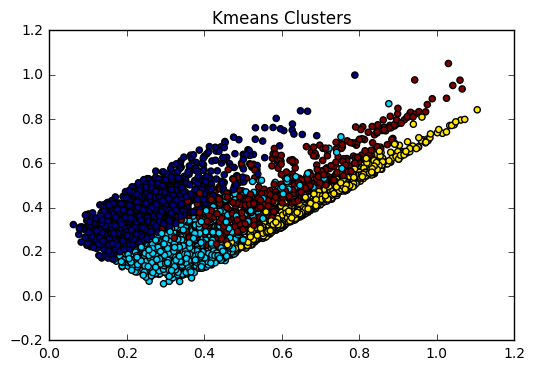

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline

# Create scatter plot using labels from K-means model as color
labels = kmeans_model.labels_
plt.scatter(distances[:,0], distances[:,1], c=labels)
plt.title('Kmeans Clusters')
plt.show()

In [118]:
print(len(df_opps))
print(len(labels))

4128
4128


In [119]:
print(df_opps.head())

        3Bet  Hands  HandsVsPlayer  Losses  Net Won       PFR        Pareto  \
16  0.094972   1057          103.0    82.0  -269.21  0.243141  Pareto Shark   
24  0.049689    390           19.0    14.0   -87.12  0.102564  Pareto Shark   
36  0.027778    716           10.0     6.0   -40.88  0.138268  Pareto Shark   
51  0.073333    427           24.0    16.0    -8.78  0.126464  Pareto Shark   
56  0.045662   1298           76.0    33.0   -18.45  0.083975          Mark   

   Player Alias  Poker Site  PostflopAggPercent   ...    VsPlayer  \
16    Player 17          19            0.486239   ...      -50.46   
24    Player 25          19            0.308571   ...       -8.15   
36    Player 37           2            0.349057   ...       -9.28   
51    Player 52          19            0.303371   ...      -26.46   
56    Player 57           2            0.238318   ...        3.43   

    W$WSFPercent  WTSDPercent  Wins  Won$atSD  bbPer100h_VsPlayer   bb_won  \
16      0.582160     0.267606  2

In [120]:
df_opps['labels'] = labels

In [121]:
print(df_opps.head())

        3Bet  Hands  HandsVsPlayer  Losses  Net Won       PFR        Pareto  \
16  0.094972   1057          103.0    82.0  -269.21  0.243141  Pareto Shark   
24  0.049689    390           19.0    14.0   -87.12  0.102564  Pareto Shark   
36  0.027778    716           10.0     6.0   -40.88  0.138268  Pareto Shark   
51  0.073333    427           24.0    16.0    -8.78  0.126464  Pareto Shark   
56  0.045662   1298           76.0    33.0   -18.45  0.083975          Mark   

   Player Alias  Poker Site  PostflopAggPercent   ...    VsPlayer  \
16    Player 17          19            0.486239   ...      -50.46   
24    Player 25          19            0.308571   ...       -8.15   
36    Player 37           2            0.349057   ...       -9.28   
51    Player 52          19            0.303371   ...      -26.46   
56    Player 57           2            0.238318   ...        3.43   

    W$WSFPercent  WTSDPercent  Wins  Won$atSD  bbPer100h_VsPlayer   bb_won  \
16      0.582160     0.267606  2

In [122]:
df_opps['labels'].unique()

array([3, 0, 1, 2], dtype=int64)

In [123]:
df_0 = df_opps[df_opps['labels'] == 0]
df_1 = df_opps[df_opps['labels'] == 1]
df_2 = df_opps[df_opps['labels'] == 2]

print(df_0.describe())
print(df_1.describe())
print(df_2.describe())

              3Bet        Hands  HandsVsPlayer       Losses      Net Won  \
count  1068.000000  1068.000000    1068.000000  1068.000000  1068.000000   
mean      0.030142   339.935393      26.732210    14.020599   -20.334476   
std       0.034283   598.485465      37.185286    19.209386    50.937652   
min       0.000000    42.000000      10.000000     1.000000  -520.500000   
25%       0.000000   116.750000      12.000000     7.000000   -36.747500   
50%       0.021961   183.000000      17.000000     9.000000   -12.915000   
75%       0.042599   322.250000      26.000000    14.000000     5.425000   
max       0.281250  8166.000000     677.000000   356.000000   138.710000   

               PFR   Poker Site  PostflopAggPercent        VP$IP     VsPlayer  \
count  1068.000000  1068.000000         1068.000000  1068.000000  1068.000000   
mean      0.080553    16.198502            0.303877     0.386633     2.791662   
std       0.057400     6.332546            0.103789     0.142280    14.4

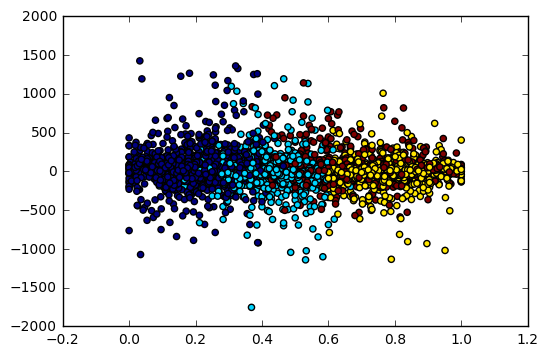

In [124]:
plt.scatter(df_opps['pfr_rate'], df_opps['bbPer100h_VsPlayer'], c=labels)
plt.show()